# Figure 2: Student and faculty speakers at MSTP Symposium

This notebook uses Python3 and imports all necessary dependencies as it is run. 

**Input**: Takes in the raw datafile entitled "speakers_raw_data.csv" in the `data` directory.  
**Output**: Saves a PDF of figure 2 to `figures` directory. 

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
from matplotlib.font_manager import FontProperties 
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import gca
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec

In [5]:
# import raw data into a Pandas dataframe 
DF = pd.read_csv('../data/speakers_raw_data.csv') # this path may need to be updated depending on where you running this script from and where you have the raw datafile saved
DF.rename(columns={'AY':'academic year'}, inplace=True)

# uncomment this to print the dataframe
# DF

In [6]:
# determine the average + SD student, faculty, and keynote speakers 

# students
avg_fstudent = DF['female_student'].mean()
std_fstudent = DF['female_student'].std()
avg_mstudent = DF['male_student'].mean()
std_mstudent = DF['male_student'].std()

# faculty
avg_ffaculty = DF['female_faculty'].mean()
std_ffaculty = DF['female_faculty'].std()
avg_mfaculty = DF['male_faculty'].mean()
std_mfaculty = DF['male_faculty'].std()

# keynotes
avg_fkeynote = DF['female_keynote'].mean()
std_fkeynote = DF['female_keynote'].std()
avg_mkeynote = DF['male_keynote'].mean()
std_mkeynote = DF['male_keynote'].std()

# print below
print("Average female student speakers (std): ", round(avg_fstudent, 3), "(", round(std_fstudent, 3),")")
print("Average male student speakers (std): ", round(avg_mstudent, 3), "(", round(std_mstudent, 3),")")
print("\n")
print("Average female faculty speakers (std): ", round(avg_ffaculty, 3), "(", round(std_ffaculty, 3),")")
print("Average male faculty speakers (std): ", round(avg_mfaculty, 3), "(", round(std_mfaculty, 3),")")
print("\n")
print("Average female keynote speakers (std): ", round(avg_fkeynote, 3), "(", round(std_fkeynote, 3),")")
print("Average male keynote speakers (std): ", round(avg_mkeynote, 3), "(", round(std_mkeynote, 3),")")


Average female student speakers (std):  1.682 ( 1.644 )
Average male student speakers (std):  1.955 ( 1.174 )


Average female faculty speakers (std):  0.273 ( 0.55 )
Average male faculty speakers (std):  1.091 ( 1.875 )


Average female keynote speakers (std):  0.182 ( 0.395 )
Average male keynote speakers (std):  0.727 ( 0.456 )


/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


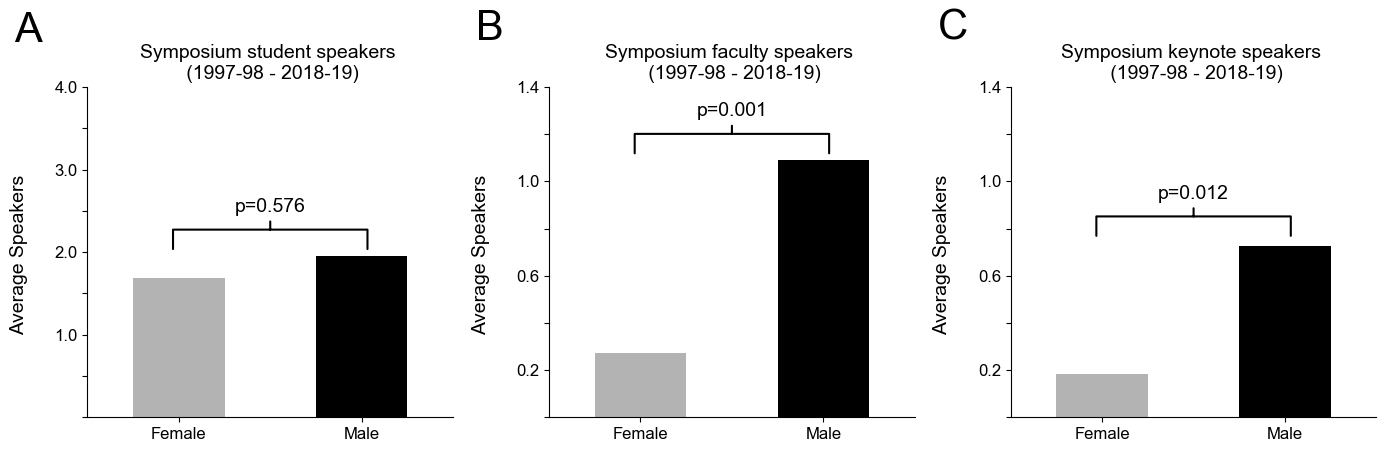

In [150]:
# # generate new dataframes from the above averages and std devs 
# data = [['fstudent', avg_fstudent, std_fstudent], ['mstudent', avg_mstudent, std_mstudent], ['ffaculty', avg_ffaculty, std_ffaculty], ['mfaculty', avg_mfaculty, std_mfaculty], ['fkeynote', avg_fkeynote, std_fkeynote], ['mkeynote', avg_mkeynote, std_mkeynote]]
# fig = pd.DataFrame(data, columns = ['category', 'average', 'std_dev'])

# student = fig.loc[[0,1]]
# student['category'] = student['category'].replace({'fstudent' : 'Female', 'mstudent' : 'Male'}, regex=True)

# faculty = fig.loc[[2,3]]
# faculty['category'] = faculty['category'].replace({'ffaculty' : 'Female', 'mfaculty' : 'Male'}, regex=True)

# keynote = fig.loc[[4,5]]
# keynote['category'] = keynote['category'].replace({'fkeynote' : 'Female', 'mkeynote' : 'Male'}, regex=True)

# generate a figure with three subplots
fig2 = plt.figure(figsize=(14,8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 9)

ax1 = fig2.add_subplot(gs[0,0:3]) # student speakers
ax2 = fig2.add_subplot(gs[0,3:6]) # faculty speakers
ax3 = fig2.add_subplot(gs[0,6:9]) # keynote spekaers

# make sure tick labels are in the correct font
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
    
# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    
# set fontsize of axes 
ax = plt.gca()
for ax in axes: 
    ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 10)

# ax1 
error1 = [std_fstudent, std_mstudent]
colors1 = ['#B3B3B3','#000000']
ecolors1 = ['#B3B3B3','#000000']
ax1 = student.plot.bar(x='category', y='average', ax=ax1, color=colors1, legend=False)
ax1.set_title('Symposium student speakers \n (1997-98 - 2018-19)', fontname='Arial', fontsize=14)
ax1.set_ylim([0, 4])
ax1.tick_params(labelrotation=0)
ax1.set_yticklabels(['', '', '1.0', '', '2.0', '', '3.0', '', '4.0'], fontname='Arial', fontsize=12, minor=False)
ax1.set_xticklabels(['Female', 'Male'], fontname='Arial', fontsize=12, minor=False)
ax1.set_xlabel('')
ax1.set_ylabel('Average Speakers \n', fontname='Arial', fontsize=14)

# ax2 
error2 = [std_ffaculty, std_mfaculty]
colors2 = ['#B3B3B3','#000000']
ecolors2 = ['#B3B3B3','#000000']
ax2 = faculty.plot.bar(x='category', y='average', ax=ax2, color=colors2, legend=False)
ax2.set_title('Symposium faculty speakers \n (1997-98 - 2018-19)', fontname='Arial', fontsize=14)
ax2.set_ylim([0, 1.4])
ax2.tick_params(labelrotation=0)
ax2.set_yticklabels(['', '0.2', '', '0.6', '', '1.0', '', '1.4'], fontname='Arial', fontsize=12, minor=False)
ax2.set_xticklabels(['Female', 'Male'], fontname='Arial', fontsize=12, minor=False)
ax2.set_xlabel('')
ax2.set_ylabel('Average Speakers \n', fontname='Arial', fontsize=14)

# ax3 
error3 = [std_fkeynote, std_mkeynote]
colors3 = ['#B3B3B3','#000000']
ecolors3 = ['#B3B3B3','#000000']
ax3 = keynote.plot.bar(x='category', y='average', ax=ax3, color=colors3, legend=False)
ax3.set_title('Symposium keynote speakers \n (1997-98 - 2018-19)', fontname='Arial', fontsize=14)
ax3.set_ylim([0, 1.4])
ax3.set_yticklabels(['', '0.2', '', '0.6', '', '1.0', '', '1.4'], fontname='Arial', fontsize=12, minor=False)
ax3.set_xticklabels(['Female', 'Male'], fontname='Arial', fontsize=12, minor=False, rotation=0)
ax3.set_xlabel('')
ax3.set_ylabel('Average Speakers \n', fontname='Arial', fontsize=14)

# plt.text(-5,1,'p = 0.576') # updated as of Dec, 2019 
# plt.text(-2.4,1,'p = 0.001')
# plt.text(0.2,1,'p = 0.012')

# add the p values above these plots
ax1.annotate('p=0.576', xy=(0.5, 0.56), xytext=(0.5, 0.61), xycoords='axes fraction', FontProperties='Arial', 
            fontsize=14, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=1', lw=1.5))

ax2.annotate('p=0.001', xy=(0.5, 0.85), xytext=(0.5, 0.9), xycoords='axes fraction', FontProperties='Arial', 
            fontsize=14, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=1', lw=1.5))

ax3.annotate('p=0.012', xy=(0.5, 0.6), xytext=(0.5, 0.65), xycoords='axes fraction', FontProperties='Arial', 
            fontsize=14, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=1', lw=1.5))

# add subplot labels
ax1.text(-0.9, 4.55, "A", fontname='Arial', fontsize=30)
ax2.text(-0.9, 1.6, "B", fontname='Arial', fontsize=30)
ax3.text(-0.9, 1.6, "C", fontname='Arial', fontsize=30)

# use tight_layout to optimize spacing of axes and titles within each subplot
fig2.tight_layout()
fig2.show()

# Save plot as a PDF
plt.savefig('../figures/figure2_speakers-by-gender.pdf', dpi=300, transparent=True, bbox_inches='tight')


# Curiosity figures (not included in the paper) 

These figures show variable representation of male and female speakers (student, faculty, and keynote) over time. 

In [9]:
# reverse row order so academic years increases left to right
DF_rev = DF.iloc[::-1]

Text(0.5, 1.0, 'Student speakers by gender over time')

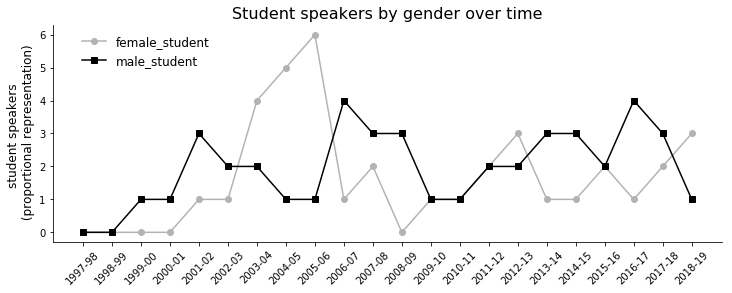

In [10]:
# set plot basic parameters
axes = plt.gca()
%matplotlib inline  
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

plt.plot('academic year', 'female_student', data=DF_rev, marker='o', color='#B3B3B3')
plt.plot('academic year', 'male_student', data=DF_rev, marker='s', color='#000000')
plt.ylabel('student speakers \n (proportional representation)', fontsize=12)
plt.legend(fontsize=12, frameon=False, bbox_to_anchor=(0.25, 1))
plt.title('Student speakers by gender over time', fontsize=16)




Text(0.5, 1.0, 'Faculty speakers by gender over time')

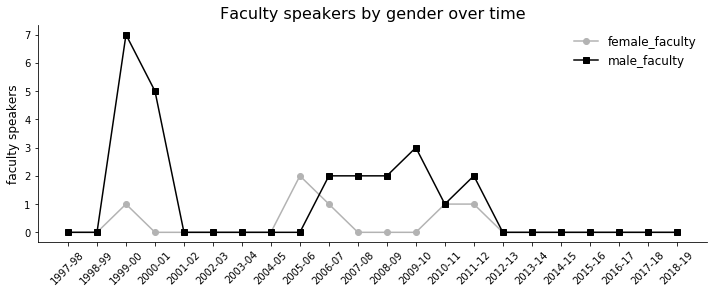

In [11]:
# set plot basic parameters
axes = plt.gca()
%matplotlib inline  
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

plt.plot('academic year', 'female_faculty', data=DF_rev, marker='o', color='#B3B3B3')
plt.plot('academic year', 'male_faculty', data=DF_rev, marker='s', color='#000000')
plt.ylabel('faculty speakers', fontsize=12)
plt.legend(fontsize=12, frameon=False, bbox_to_anchor=(1, 1))
plt.title('Faculty speakers by gender over time', fontsize=16)


Text(0.5, 1.0, 'Keynote speakers by gender over time')

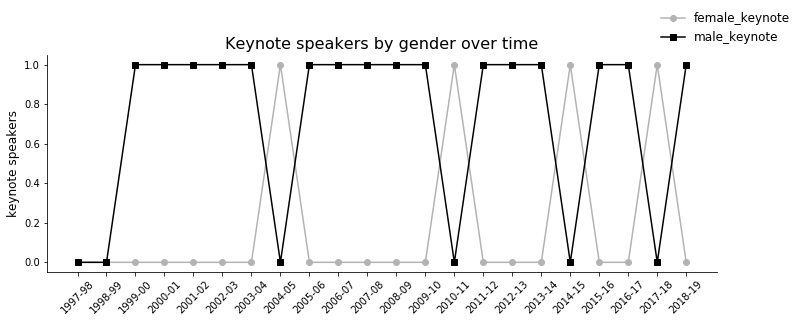

In [12]:
# set plot basic parameters
axes = plt.gca()
%matplotlib inline  
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

plt.plot('academic year', 'female_keynote', data=DF_rev, marker='o', color='#B3B3B3')
plt.plot('academic year', 'male_keynote', data=DF_rev, marker='s', color='#000000')
plt.ylabel('keynote speakers', fontsize=12)
plt.legend(fontsize=12, frameon=False, bbox_to_anchor=(0.9, 1))
plt.title('Keynote speakers by gender over time', fontsize=16)